# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# прочитаем csv файл, используя нужный разделитель текста 
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep= '\t')

In [3]:
# выведем первые 20 строк для ознакомления  
print(data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

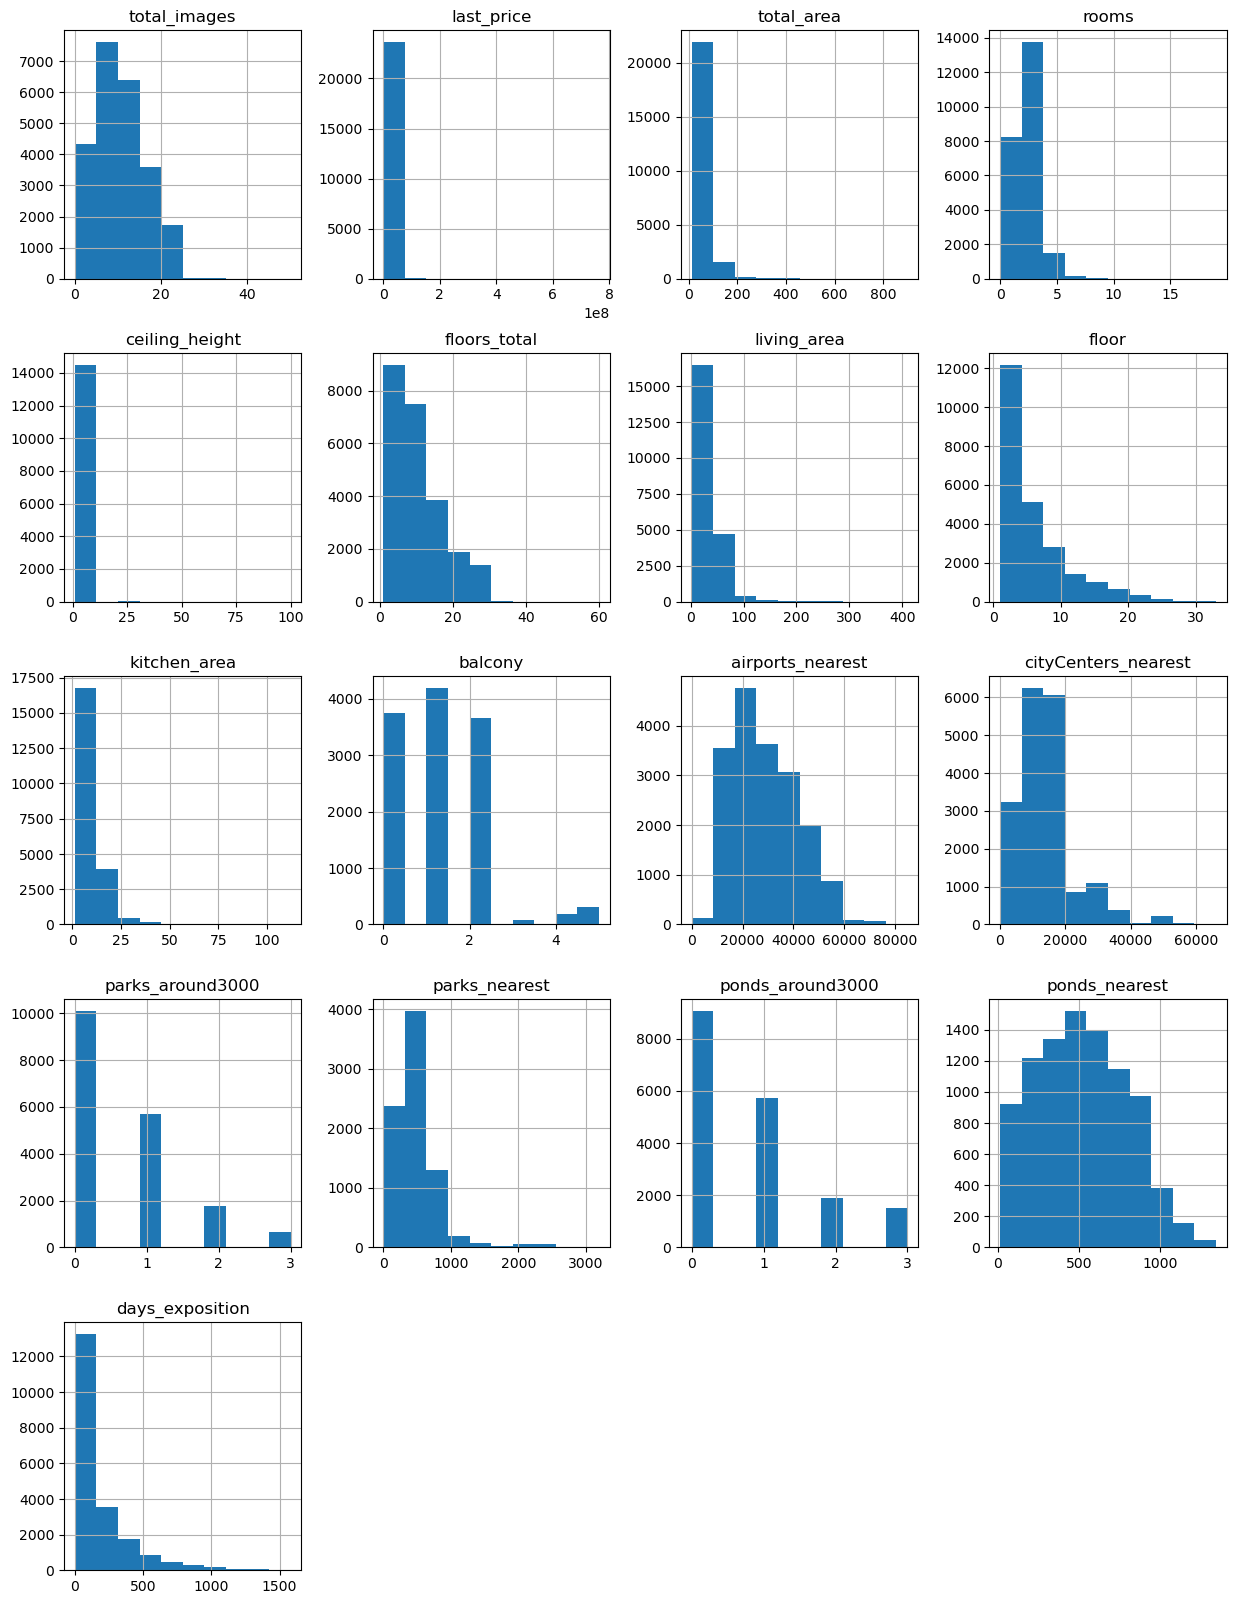

In [5]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [6]:
# Изучем в каких столбцах есть пропуски 
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [7]:
# Это булевой тип данных, скорее всего не указали, так как квартира не апартаменты, заменим на False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [8]:
# Заменяем средним
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [9]:
# Если не указаны балконы, то их скорее всего и нет, заменим на 0
data['balcony'] = data['balcony'].fillna(0)
# Если не указано, то скорее всего парков нет, так что заменим на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)
# Так же если водоемов нет, то заменим на 0 
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [10]:
# Не зная города мы не сможем анализировать данные, так что удалим строчки с неизвестным адресом 
data = data.dropna(subset= ['locality_name'])

In [11]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64


Вывод: Возможно жильцы, которые заполняли данные не знали точных размеров или решили их не указывать, считая не сильно нужными. Или же отсутсвие чего-либо было указано как пропуск из-за отсутвия этих объектов.  

In [12]:
# Начнем изменять типы данных
data['last_price'] = data['last_price'].astype('int')
# Балконы тоже в целых числах 
data['balcony'] = data['balcony'].astype('int')

data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [13]:
# Поменяем на формат для дат 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [14]:
# Проверим изменился ли тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

Вывод: Изменяем типы данных для лучшего взаимодействия с данными, для их сложения и других числовых оппераций 

In [15]:
# Узнаем количество явных дубликатов 
data.duplicated().sum()

0

In [16]:
# Удалим значения, где неизвестен этаж
data = data.dropna(subset= ['floors_total'])
# Переведем тип данных в целые числа
data['floors_total'] = data['floors_total'].astype('int')
# Посмотрим изменились ли данные
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [18]:
# Изучим названия на наличие дубликатов
data['locality_name'].value_counts()

Санкт-Петербург                    15651
посёлок Мурино                       520
посёлок Шушары                       439
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [19]:
# Посмотрим на названия
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [20]:
# Заменим все буквы ё на е
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True) 
# Так же заменим названия на поселок
data['locality_name'] = data['locality_name'].replace('поселок городского типа', 'поселок', regex=True) 
data['locality_name'] = data['locality_name'].replace('городской', 'поселок', regex=True) 

Дальше исправим высоту потолков, так как потолки 1 и 100 метров точно нет в квартирах.

In [21]:
# Уменьшаем в 10 раз для домов где потолки больше 20 метров
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height']/10
# Изменим данные где указан 1 и 1,2 метр, это слишком мало. Приведем к минимуму высоты 2 метра
data['ceiling_height'] = data['ceiling_height'].replace(1, 2)
data['ceiling_height'] = data['ceiling_height'].replace(1.2, 2)
data['ceiling_height'] = data['ceiling_height'].replace(1.75, 2)

In [22]:
# Проверим данные
print(data['ceiling_height'].sort_values().unique())

[ 2.    2.2   2.25  2.26  2.3   2.34  2.4   2.45  2.46  2.47  2.48  2.49
  2.5   2.51  2.52  2.53  2.54  2.55  2.56  2.57  2.58  2.59  2.6   2.61
  2.62  2.63  2.64  2.65  2.66  2.67  2.68  2.69  2.7   2.71  2.72  2.73
  2.74  2.75  2.76  2.77  2.78  2.79  2.8   2.81  2.82  2.83  2.84  2.85
  2.86  2.87  2.88  2.89  2.9   2.91  2.92  2.93  2.94  2.95  2.96  2.97
  2.98  2.99  3.    3.01  3.02  3.03  3.04  3.05  3.06  3.07  3.08  3.09
  3.1   3.11  3.12  3.13  3.14  3.15  3.16  3.17  3.18  3.2   3.21  3.22
  3.23  3.24  3.25  3.26  3.27  3.28  3.29  3.3   3.31  3.32  3.33  3.34
  3.35  3.36  3.37  3.38  3.39  3.4   3.42  3.43  3.44  3.45  3.46  3.47
  3.48  3.49  3.5   3.51  3.52  3.53  3.54  3.55  3.56  3.57  3.58  3.59
  3.6   3.62  3.63  3.65  3.66  3.67  3.68  3.69  3.7   3.75  3.76  3.78
  3.8   3.82  3.83  3.84  3.85  3.86  3.87  3.88  3.9   3.93  3.95  3.98
  4.    4.06  4.1   4.14  4.15  4.19  4.2   4.25  4.3   4.37  4.4   4.45
  4.5   4.65  4.7   4.8   4.9   5.    5.2   5.3   5

Вывод: Полученные данные были предоставлены в необходимом для анализа объеме. Часть данных была исправлена для правдоподобности данных.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим новые столбцы, которые пригодятся для дальнейшего исследования

In [23]:
#цена одного квадратного метра
data['price_one_meter'] = data['last_price']/data['total_area']

In [24]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['weekday'] = data['first_day_exposition'].dt.weekday

In [25]:
#месяц публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
#год публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [26]:
#тип этажа квартиры (значения — «‎первый», «последний», «другой»)
def floor_classification(row):
    if row['floor'] == 1:
        return 'первый'
    elif  row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['classification_floor'] = data.apply(floor_classification, axis=1)

In [27]:
#расстояние до центра города в километрах
def city_center_km(distance):
    return distance['cityCenters_nearest']/1000

data['city_center_km'] = data.apply(city_center_km, axis=1)

In [28]:
# Я не понимаю почему это не работает, даже если перезаписывать. В целом он округлил, но числа все равно остались дробными
data['city_center_km'] = data.loc[~data['city_center_km'].isna(), 'city_center_km'].astype(int)

In [29]:
data['last_price_mln'] = data['last_price'] / 1000000

### Проведите исследовательский анализ данных

Начнем поочереди рассматривать столбцы с данными и их гистограммы

In [30]:
data['total_area'].value_counts()

45.00     419
42.00     383
31.00     346
60.00     346
44.00     343
         ... 
130.21      1
58.71       1
60.75       1
63.19       1
76.75       1
Name: total_area, Length: 2159, dtype: int64

<AxesSubplot:>

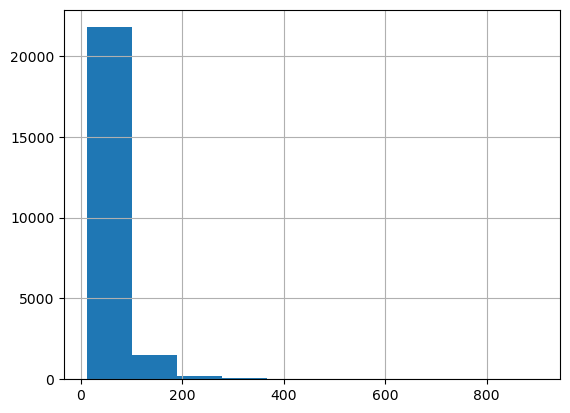

In [31]:
data['total_area'].hist()

Общая жилая площадь чаще всего от 30 до 60 кв м

In [32]:
data['living_area'].value_counts()

18.00     882
17.00     673
30.00     598
16.00     483
20.00     479
         ... 
82.10       1
68.48       1
31.12       1
160.10      1
42.55       1
Name: living_area, Length: 1769, dtype: int64

<AxesSubplot:>

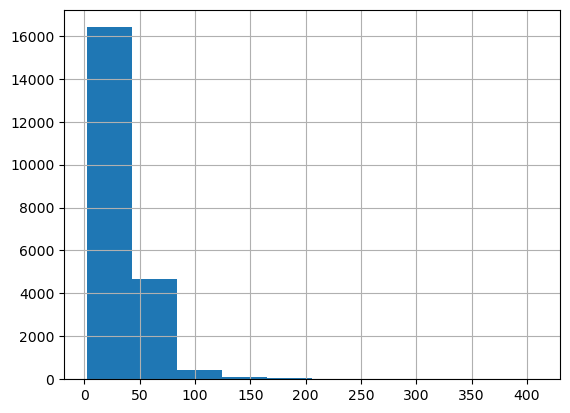

In [33]:
data['living_area'].hist()

Жилая площадь чаще всего от 15 до 30 кв м

In [34]:
data['kitchen_area'].value_counts()

6.00     1298
10.00    1259
8.00     1108
9.00     1099
7.00     1062
         ... 
53.10       1
12.56       1
11.84       1
13.17       1
13.83       1
Name: kitchen_area, Length: 963, dtype: int64

<AxesSubplot:>

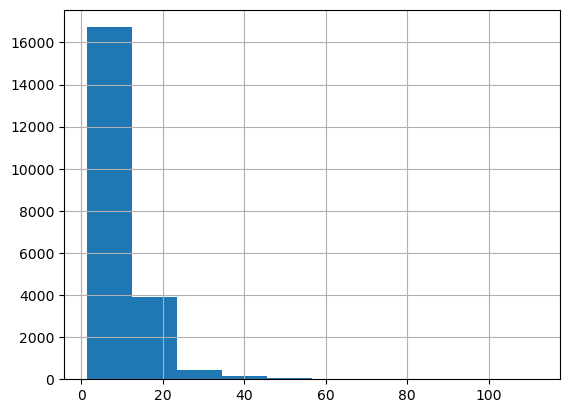

In [35]:
data['kitchen_area'].hist()

Чаще всего размер кухни колеблется от 6 до 10 кв м 

In [36]:
data['last_price'].value_counts()

4500000     341
3500000     289
4300000     260
4000000     260
4200000     258
           ... 
7778000       1
12890000      1
29375000      1
7545600       1
11475000      1
Name: last_price, Length: 2925, dtype: int64

<AxesSubplot:>

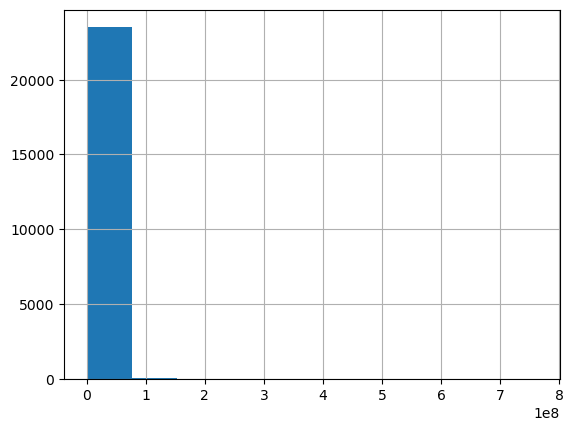

In [37]:
data['last_price'].hist()

Самая популярная цена это 4 млн

In [38]:
data['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

<AxesSubplot:>

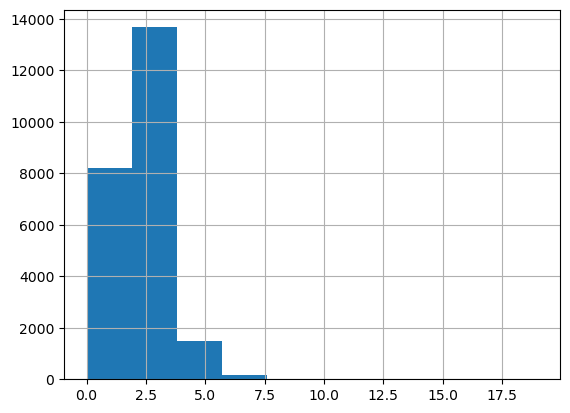

In [39]:
data['rooms'].hist()

Чем больше комнат тем меньше таких квартир продают. Самые распространенные однушки и двушки 

In [40]:
data['ceiling_height'].value_counts()

2.65    9758
2.50    3522
2.60    1646
2.70    1579
3.00    1108
        ... 
3.43       1
4.30       1
3.39       1
4.65       1
3.59       1
Name: ceiling_height, Length: 173, dtype: int64

<AxesSubplot:>

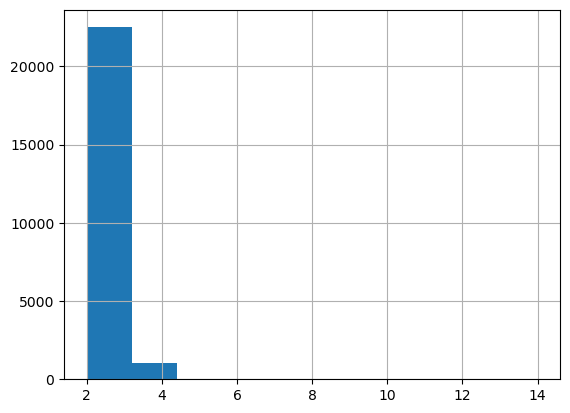

In [41]:
data['ceiling_height'].hist()

В основном на продажу выставлялись квартиры со стандартной высотой потолка в районе 2,6 м

In [42]:
data['floor'].value_counts()

2     3351
3     3061
1     2909
4     2793
5     2612
6     1293
7     1211
8     1075
9     1045
10     684
11     520
12     519
13     376
15     340
14     333
16     315
17     226
18     175
19     144
21     119
22     111
20     108
23      98
24      61
25      46
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

<AxesSubplot:>

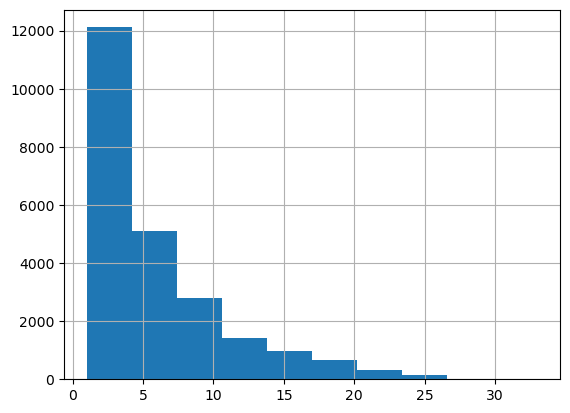

In [43]:
data['floor'].hist()

Квартиры в основном продаются на нижних этажах, так как и сами дома в основном не многоэтажные.

In [44]:
data['classification_floor'].value_counts()

другой       17326
последний     3330
первый        2909
Name: classification_floor, dtype: int64

<AxesSubplot:>

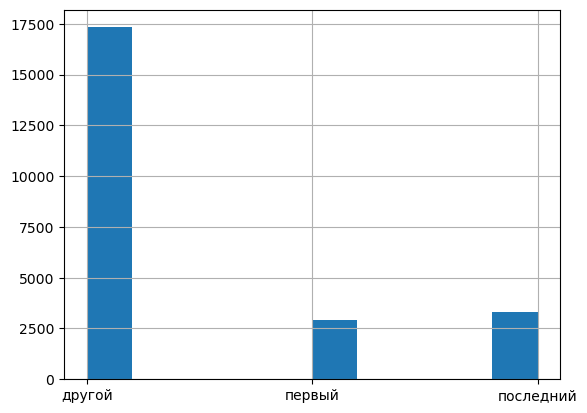

In [45]:
data['classification_floor'].hist()

Большинство квартир сосредоточено на не крайних этажах.

In [46]:
data['floors_total'].value_counts()

5     5775
9     3758
16    1375
12    1361
4     1193
10    1174
25    1075
6      910
17     833
3      667
7      589
14     553
18     505
24     462
8      388
2      381
15     365
23     349
19     339
22     286
20     271
13     229
11     202
27     164
21     158
26     124
1       25
35      24
28      21
36       3
34       1
60       1
29       1
33       1
52       1
37       1
Name: floors_total, dtype: int64

<AxesSubplot:>

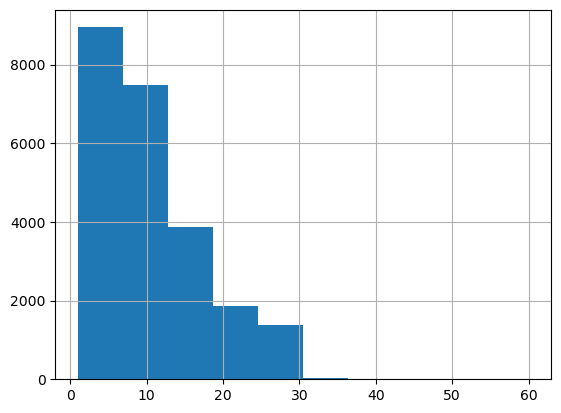

In [47]:
data['floors_total'].hist()

Распространены одноэтажные или малоэтажные здания. Сильно многоэтажек немного.

In [48]:
data['cityCenters_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
20444.0    27
8434.0     27
           ..
1507.0      1
1806.0      1
15782.0     1
25620.0     1
6263.0      1
Name: cityCenters_nearest, Length: 7623, dtype: int64

<AxesSubplot:>

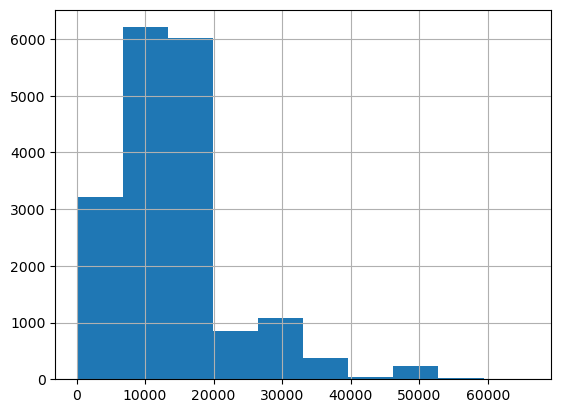

In [49]:
data['cityCenters_nearest'].hist()

В основном квартиры продаются примерно от 8 км от центра

In [50]:
data['airports_nearest'].value_counts()

37434.0    61
21928.0    32
44870.0    30
39946.0    30
18732.0    27
           ..
23576.0     1
30204.0     1
21961.0     1
25212.0     1
24665.0     1
Name: airports_nearest, Length: 8251, dtype: int64

<AxesSubplot:>

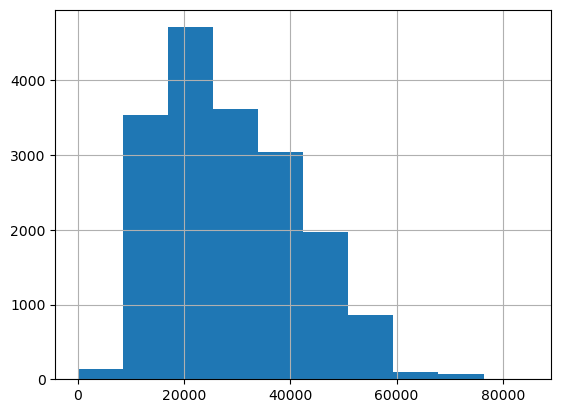

In [51]:
data['airports_nearest'].hist()

Так же они в основном расположены примерно в 2 км от аэропорта.

In [52]:
data['parks_nearest'].value_counts()

441.0     67
392.0     41
173.0     41
456.0     40
471.0     31
          ..
770.0      1
1120.0     1
887.0      1
92.0       1
2984.0     1
Name: parks_nearest, Length: 994, dtype: int64

<AxesSubplot:>

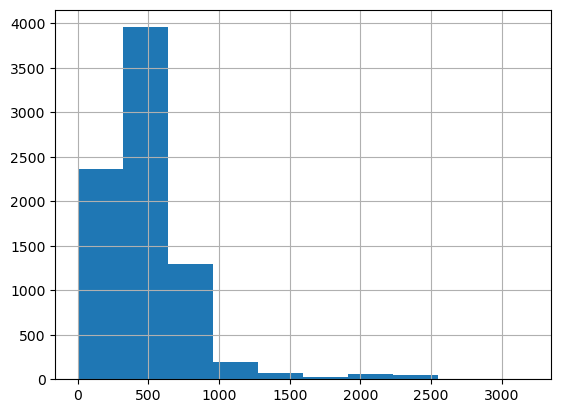

In [53]:
data['parks_nearest'].hist()

А вот от парков квартиры расположены чаще всего в 400 метрах.

In [54]:
data['weekday'].value_counts()

3    4276
1    4163
4    3980
2    3948
0    3596
5    1919
6    1683
Name: weekday, dtype: int64

<AxesSubplot:>

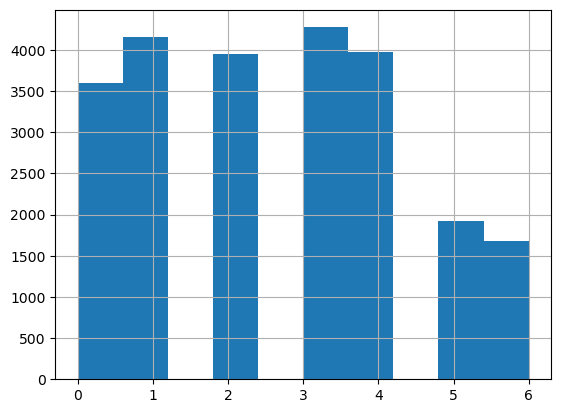

In [55]:
data['weekday'].hist()

Чаще всего объявления выставляли в будние дни. Самые популярные дни вторник и четверг

In [56]:
data['month'].value_counts()

2     2636
3     2575
11    2360
4     2356
10    2108
9     1972
6     1747
8     1739
7     1686
12    1638
1     1487
5     1261
Name: month, dtype: int64

<AxesSubplot:>

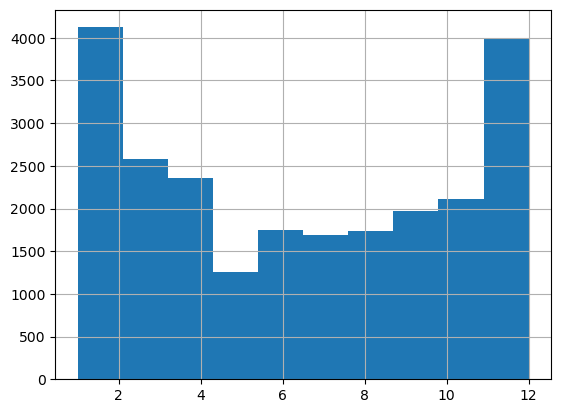

In [57]:
data['month'].hist()

Чаще всего квартиры выставляют на продажу в феврале и начале весны, и так же в перед новым годом(октябрь, ноябрь)

Изучим, как быстро продавались квартиры (столбец days_exposition).

In [58]:
data['days_exposition'].value_counts()

45.0      879
60.0      538
7.0       234
30.0      208
90.0      200
         ... 
964.0       1
1147.0      1
1228.0      1
1112.0      1
971.0       1
Name: days_exposition, Length: 1139, dtype: int64

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

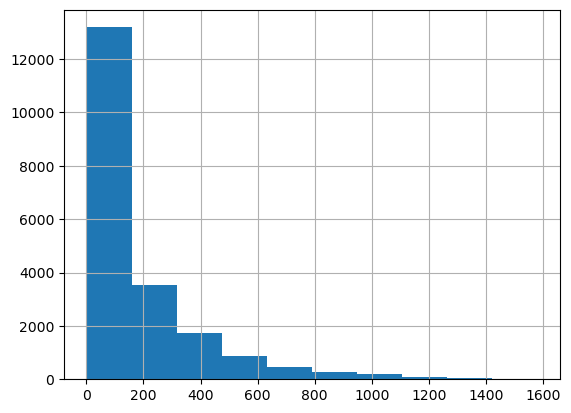

In [59]:
data['days_exposition'].hist()
data['days_exposition'].describe()

Вывод: Обычно продажа занимает три месяца. Продажи считаются быстрыми которые продаются чуть больше месяца, а необычно долги, те которые висят больше года.

Начнем анализировать какие факторы больше влияют на итоговую цену квартиры.

Перед анализом удалим выбросы в стоимости.

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price_mln, dtype: float64


<AxesSubplot:>

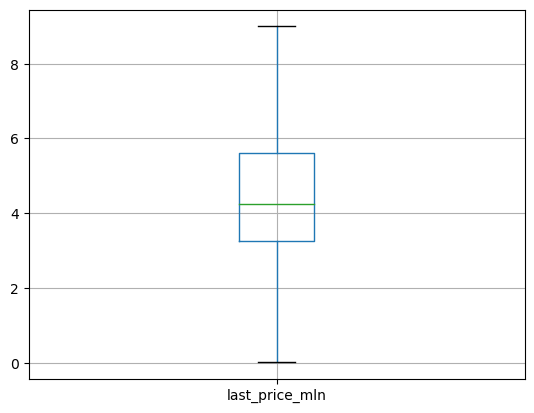

In [60]:
# Посмотрим на среднее и медиану и отклонение
print(data['last_price_mln'].describe())
# Посмотрим на коробку с усами и убрем выбросы
data.query('last_price_mln < 9').boxplot(column= 'last_price_mln')

In [61]:
# Создадим новую переменную чтобы посмотреть на среднее, медиану и отклоление 
new_data = data.query('last_price_mln < 9')
# Снова посотрим на среднее и медиану после удаления выбросов
print(new_data['last_price_mln'].describe())

count    20181.000000
mean         4.482009
std          1.778707
min          0.012190
25%          3.250000
50%          4.250000
75%          5.600000
max          8.999999
Name: last_price_mln, dtype: float64


Начнем анализ с общей площади

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

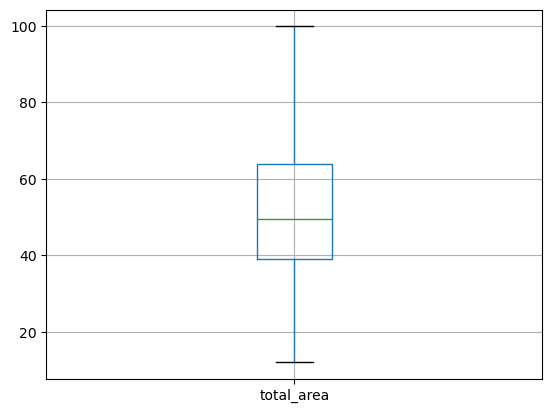

In [62]:
# Посмотрим на среднее и медиану 
print(data['total_area'].describe())
# Посмотрим на коробку с усами и убрем выбросы
data.query('total_area < 100').boxplot(column= 'total_area')

<AxesSubplot:xlabel='last_price_mln'>

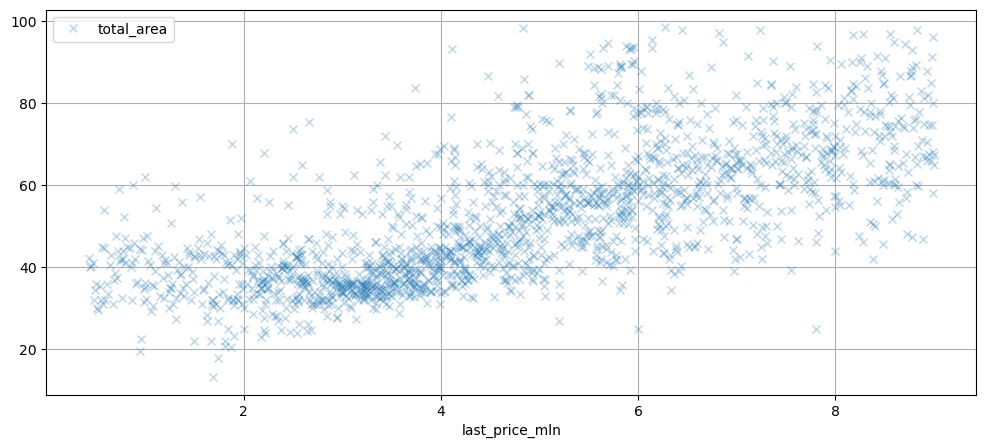

In [63]:
# Посмотрим как распределяются значения после удаления выбросов 
(data
 .query('last_price_mln < 9 and total_area < 100')
 .pivot_table(index='last_price_mln', values='total_area', aggfunc='median')
 .plot(style='x', grid=True, alpha=0.3, figsize=(12, 5))
)

In [64]:
# Посчитаем корреляцию
print(data['last_price_mln'].corr(data['total_area']))

0.6536213939252813


Судя по корреляции(0,65) связь есть, однако не слишком сильная.
Вывод: Чем больше общая площать тем обычно дороже квартира.

Теперь рассмотрим жилую площадь.

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


<AxesSubplot:>

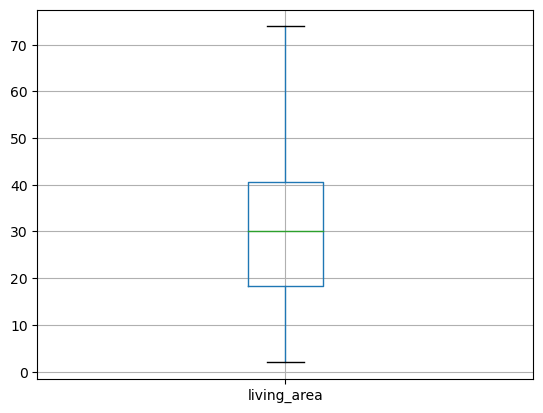

In [65]:
# Посмотрим на среднее и медиану и отклонение
print(data['living_area'].describe())
# Посмотрим на коробку с усами и убрем выбросы
(data
 .query('living_area < 74')
 .boxplot(column= 'living_area')
)

<AxesSubplot:xlabel='last_price_mln'>

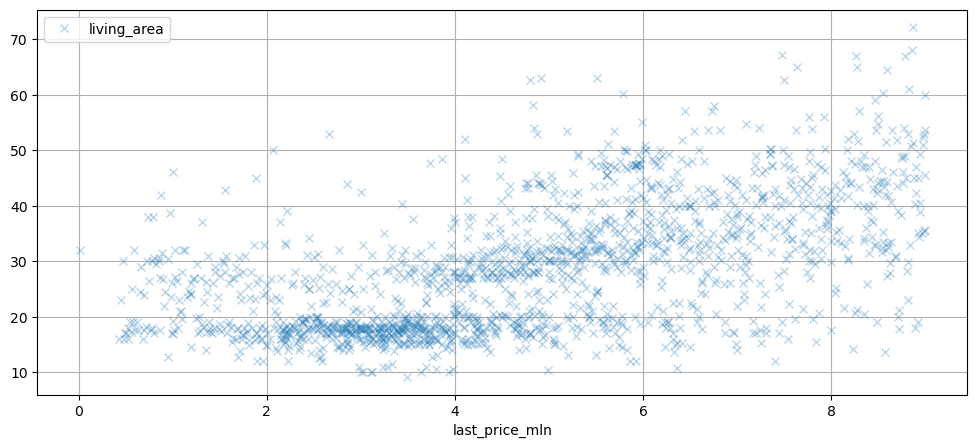

In [66]:
# Посмотрим на графике
(data
 .query('last_price_mln < 9 and living_area < 74')
 .pivot_table(index='last_price_mln', values='living_area', aggfunc='median')
 .plot(style='x', grid=True, alpha=0.3, figsize=(12, 5))
)

In [67]:
# Посчитаем корреляцию
print(data['last_price_mln'].corr(data['living_area']))

0.5663795524388777


Судя по корреляции(0,57) связь есть, однако не слишком сильная.
Вывод: Чем больше жилая площать тем обычно дороже квартира.

Теперь рассмотрим площади кухни.

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


<AxesSubplot:>

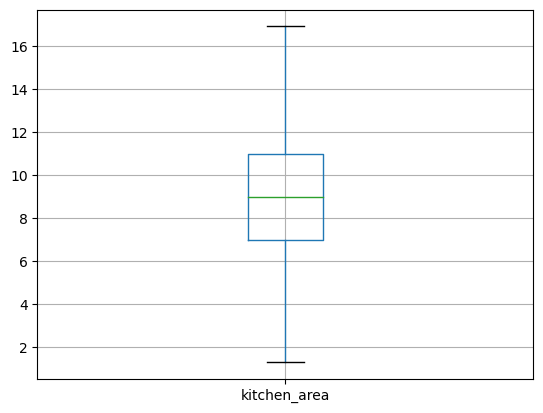

In [68]:
# Посмотрим на среднее и медиану и отклонение
print(data['kitchen_area'].describe())
# Посмотрим на коробку с усами и убрем выбросы
(data
 .query('kitchen_area < 17')
 .boxplot(column= 'kitchen_area')
)

<AxesSubplot:xlabel='last_price_mln'>

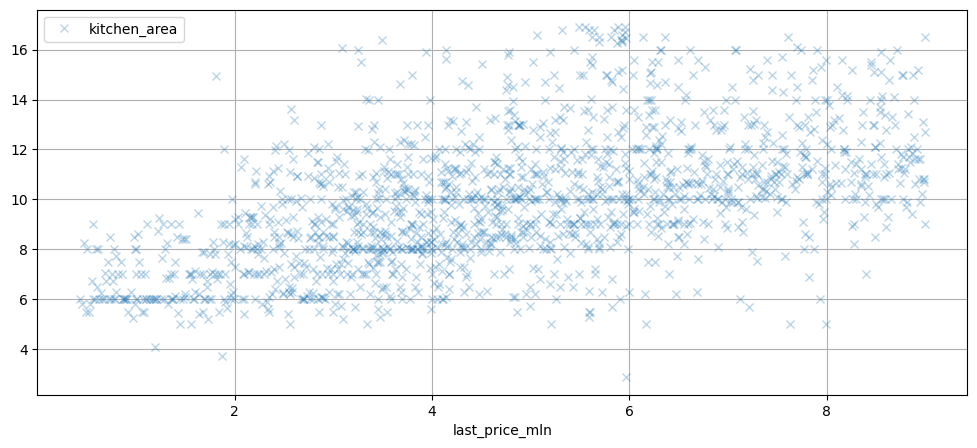

In [69]:
# Посмотрим на графике
(data
 .query('last_price_mln < 9 and kitchen_area < 17')
 .pivot_table(index='last_price_mln', values='kitchen_area', aggfunc='median')
 .plot(style='x', grid=True, alpha=0.3, figsize=(12, 5))
)

In [70]:
# Посчитаем корреляцию
print(data['last_price_mln'].corr(data['kitchen_area']))

0.5203617949655247


Судя по корреляции(0,52) связь есть, однако не слишком сильная.
Вывод: Чем больше площать кухни тем обычно дороже квартира.

Теперь рассмотрим количество комнат.

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


<AxesSubplot:>

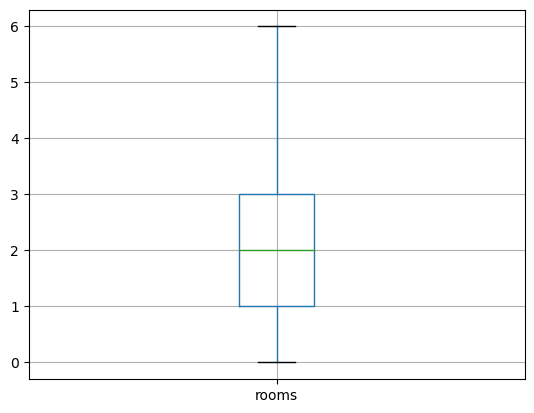

In [71]:
# Посмотрим на среднее и медиану и отклонение
print(data['rooms'].describe())
# Посмотрим на коробку с усами и убрем выбросы
(data
 .query('rooms < 7')
 .boxplot(column= 'rooms')
)

<AxesSubplot:xlabel='last_price_mln'>

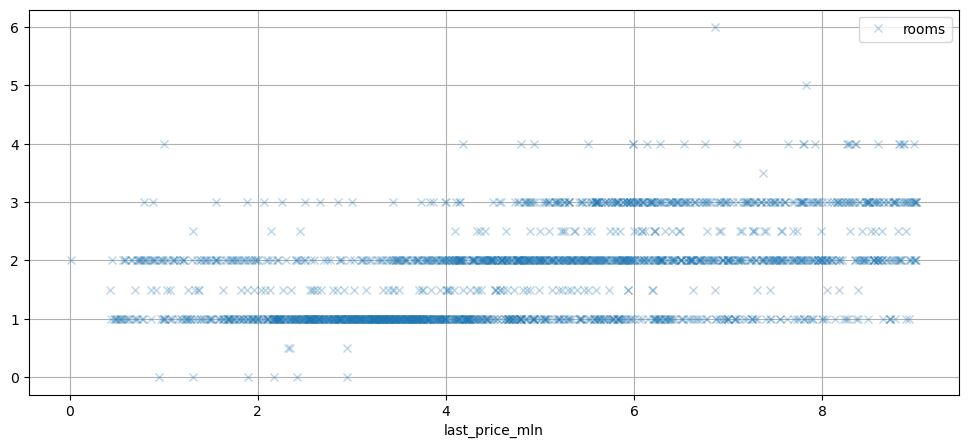

In [90]:
# Посмотрим на графике
(data
 .query('last_price_mln < 9 and rooms < 7')
 .pivot_table(index='last_price_mln', values='rooms', aggfunc='median')
 .plot(style='x', grid=True, alpha=0.3, figsize=(12, 5))
)

In [77]:
# Посчитаем корреляцию
print(data['last_price_mln'].corr(data['rooms']))

0.3631905485065671


Судя по корреляции(0,36) связь практически отсутсвует.
Вывод: Чем больше комнат тем обычно дороже квартира.

Теперь рассмотрим этаж, на котором расположена квартира (первый, последний, другой).

In [78]:
# Посмотрим на среднее и медиану и отклонение
print(data['floor'].describe())
# Посмотрим на коробку с усами и убрем выбросы
(data
 .query('floor < 15')
 .boxplot(column= 'floor')
)

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


NumExprClobberingError: Variables in expression "(floor) < (15)" overlap with builtins: ('floor')

In [75]:
# Посмотрим на графике
(data
 .query('last_price_mln < 9 and floor < 15')
 .pivot_table(index='last_price_mln', values='rooms', aggfunc='median')
 .plot(style='x', grid=True, alpha=0.3, figsize=(12, 5))
)

NumExprClobberingError: Variables in expression "((last_price_mln) < (9)) & ((floor) < (15))" overlap with builtins: ('floor')

In [79]:
# Посчитаем корреляцию
print(data['last_price_mln'].corr(data['floor']))

0.026841775356835764


Судя по корреляции(0,02) связь отсутсвует.

Теперь рассмотрим даты размещения (день недели, месяц, год)

In [80]:
# Посчитаем корреляцию по дню недели
print(data['last_price_mln'].corr(data['weekday']))

0.0013569211122710853


Судя по корреляции(0,0) связь отсутсвует.

In [81]:
# Посчитаем корреляцию по месяцу
print(data['last_price_mln'].corr(data['month']))

0.0027259571647347456


Судя по корреляции(0,0) связь отсутсвует.

In [82]:
# Посчитаем корреляцию по году
print(data['last_price_mln'].corr(data['year']))

-0.04286415271361016


Судя по корреляции(0,0) связь отсутсвует.

Теперь рассмотрим этаж, на котором расположена квартира (первый, последний, другой).

<AxesSubplot:xlabel='classification_floor', ylabel='last_price_mln'>

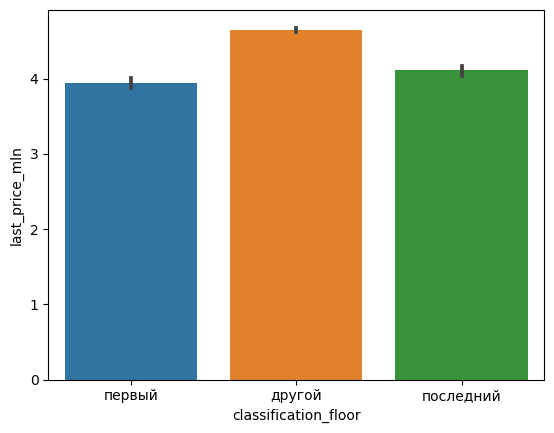

In [83]:
# Отфильтруем данные от выбросов
data_check = data.query('last_price_mln < 9')
# Построим диаграмму 
sns.barplot(x="classification_floor", y="last_price_mln",  data= data_check)

Корреляция с этажностью(не первый и не последний) видна на графике.
Таких квартир больше и они дороже.

Теперь рассмотрим даты размещения (день недели, месяц, год)

<AxesSubplot:xlabel='weekday', ylabel='last_price_mln'>

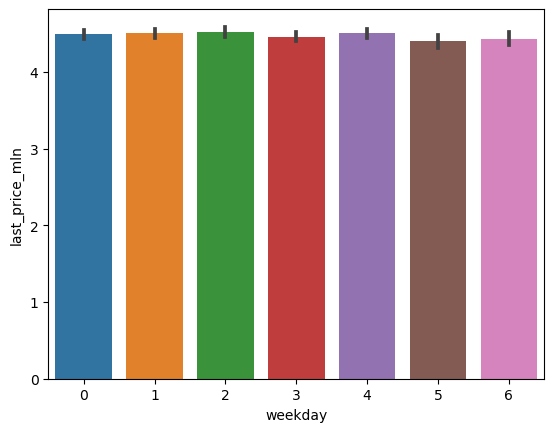

In [84]:
# Построим диаграмму 
sns.barplot(x="weekday", y="last_price_mln",  data= data_check)

День недели не влияет на стоимость.

<AxesSubplot:xlabel='month', ylabel='last_price_mln'>

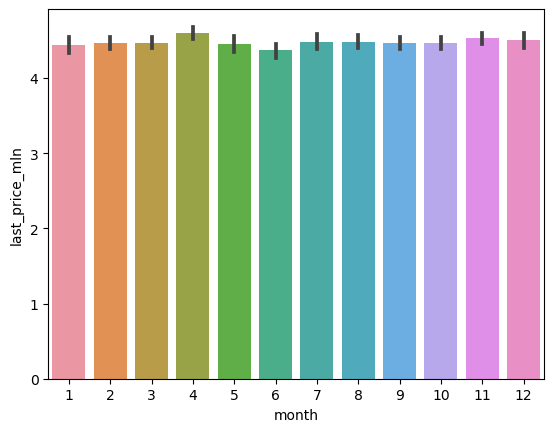

In [85]:
# Построим диаграмму 
sns.barplot(x="month", y="last_price_mln",  data= data_check)

Месяц не влияет на стоимость.

2018    8486
2017    8161
2019    2871
2016    2745
2015    1166
2014     136
Name: year, dtype: int64

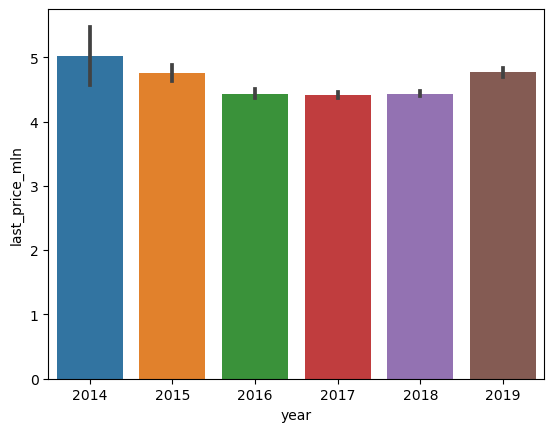

In [86]:
# Построим диаграмму 
sns.barplot(x="year", y="last_price_mln",  data= data_check)
data['year'].value_counts()

В целом зависимости тоже нет. Данные представлены с 2014 года и их меньше чем в остальные года, так что на вид в 2014 году зависимость от цены выше. Но это наблюдение может быт ьошибочным из-за малого количесва самих обявлений о продаже квартир в 2014 году. 
Возможно повышение цены в 2019 году связано с инфляцией.

Вывод: Больше всего на стоимость влияет общая площадь, после неё жилая площадь и площадь кухни. Количесво комнат практически не влияет. А этаж и дата публикации не влияют на стоимость.

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
Эти данные можно найти по имени в столбце locality_name.

In [87]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_one_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table.sort_values('count', ascending = False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.877341
поселок Мурино,552,85629.568678
поселок Шушары,439,78551.344545
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
поселок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


Теперь выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. 

<AxesSubplot:>

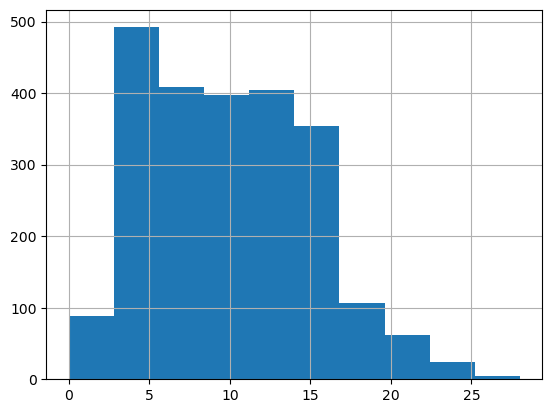

In [88]:
data.query('locality_name == "Санкт-Петербург"').groupby('last_price_mln')['city_center_km'].median().hist()

Вывод: Чем дальше от центра, тем стоимость ниже

<AxesSubplot:xlabel='city_center_km'>

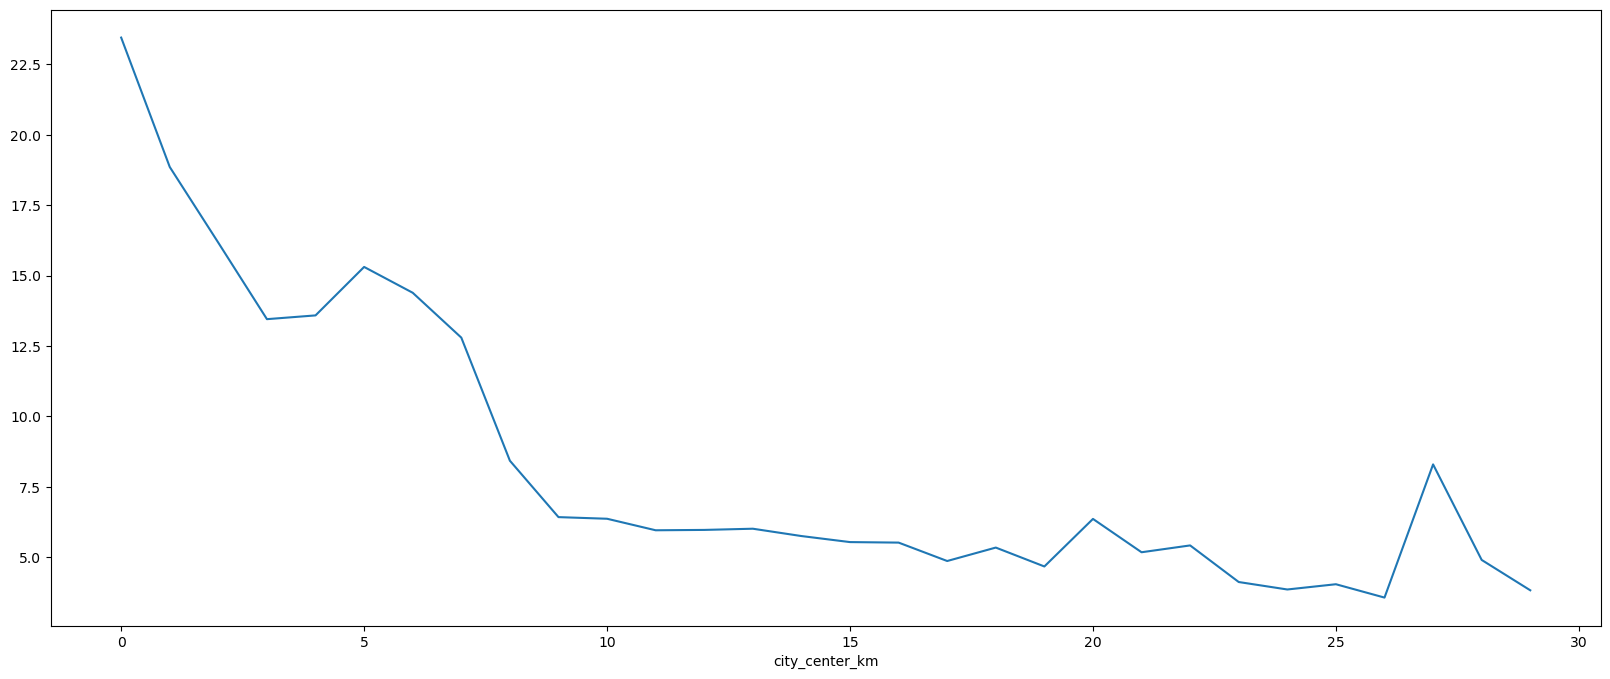

In [89]:
data[data['locality_name'] == 'Санкт-Петербург'].groupby('city_center_km')['last_price_mln'].mean().plot(figsize = (20, 8))

### Общий вывод

После изучения данных можно сказать, что можно работать с таблицами, в которых встречаются пропущенные значения. Данные всё-таки лучше очищать от явных "выбросов". В нашем примере - это дорогие квартиры, которые портили корреляции и графики зависимости полной стоимости от разных параметров. Возможно чистить данные придётся после этапа исследовательского анализа данных. 


Из необычных особенностей:

* В 27 км от центра Санкт-Петербурга есть недвижимость по цене почти равная недвижимости в 8 км. от центра

В первую десятку входят в основном ближайшие к Санкт-Петербургу города и самые крупные города области:

* Пушкин;
* Гатчина;
* Всеволожск;
* Выборг.

Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь.

Быстрые продажи это до 95 дней, а необычно долгие - свыше 181 дня.

Чем дальше от центра находиттся квартира, тем стоимость ниже.

В сухом остатке в большинстве случаев покупки жилья люди выбирают 1-2 комнатные квартиры в высотной новостройке по периметру города Санкт-Петребург, с средней стоимостью в 100 т.р. за кв.метр. и высотой потолков 2,75. Таким образом можно сделать вывод о том, что количество таких домов и соответственно предложений будет расти в след за ценой в отличии от цен на жильё расположенного по центру исторического района города в невысоких домах из старого фонда.